In [21]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry
import shapely
import rasterio
import rioxarray
from rasterio.features import shapes
from shapely.geometry import shape
import matplotlib.pyplot as plt
from pathlib import Path

In [22]:
weight_wind = [
    0.057, #landuse
    0.044, #slope
    0.088, #elevation
    0.071, #d to settlement
    0.044, #d to wetland
    0.055, #d to forest
    0.044, #prox to road
    0.088, #prox to sub
    0.261, #Resource quality
    0.247 #Farm Required area
    ]
print(sum(weight_wind))

weight_solar = [
    0.140, #landuse
    0.126, #slope
    0.063, #elevation
    0.057, #d to settlement
    0.0495, #d to wetland
    0.0275, #d to forest
    0.047, #prox to road
    0.099, #prox to sub
    0.254, #Resource quality
    0.135 #Farm Required area
    ]
print(sum(weight_solar))

0.999
0.998


In [23]:
## Create teh final SI map template ###
xr_final_SI = xr.open_dataset('Output\\xr_SI_Landcover.nc')
xr_final_SI = xr_final_SI.drop_vars('lccs_class')
xr_final_SI = xr_final_SI.drop_vars('SI_BGEC')
xr_final_SI = xr_final_SI.drop_vars('SI_Biomass')
xr_final_SI = xr_final_SI.drop_vars('SI_BGWW')
xr_final_SI = xr_final_SI.drop_vars('SI_MSW')
xr_final_SI = xr_final_SI.drop_vars('SI_IEW')
xr_final_SI = xr_final_SI.drop_vars('aux')

xr_final_SI['AVA_Wind'] = xr_final_SI['SI_Wind']
xr_final_SI['AVA_Solar'] = xr_final_SI['SI_Solar']

xr_final_SI['SI_Wind'] = 0.0
xr_final_SI['SI_Solar'] = 0.0
xr_final_SI['AVA_Wind'] = 0.0
xr_final_SI['AVA_Solar'] = 0.0
print(xr_final_SI)
check_weight_wind = 0
check_weight_solar = 0

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   float64 0.0
    SI_Wind    float64 0.0
    AVA_Wind   float64 0.0
    AVA_Solar  float64 0.0


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.057
check w solar =  0.14
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(156390.93)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(156390.93)


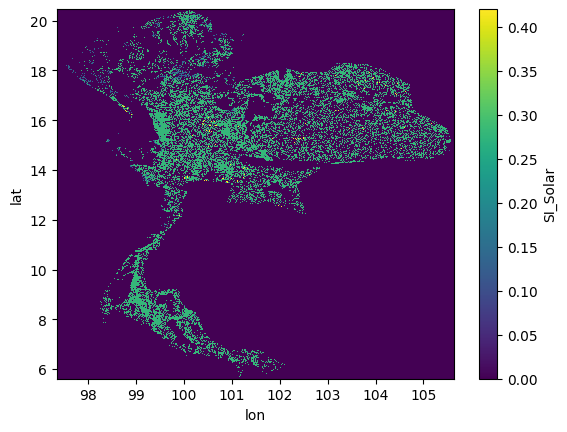

In [24]:
xr_landuse_suitability_index = xr.open_dataset('Output\\xr_SI_Landcover.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_landuse_suitability_index['SI_Wind'] * weight_wind[0])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_landuse_suitability_index['SI_Solar'] * weight_solar[0])
xr_final_SI['AVA_Wind'] = xr.where(xr_landuse_suitability_index['SI_Wind'] > 0 ,0.09,0)
xr_final_SI['AVA_Solar'] = xr.where(xr_landuse_suitability_index['SI_Solar'] > 0 ,0.09,0)

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[0]
check_weight_solar = check_weight_solar + weight_solar[0]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

In [25]:
xr_cal = xr.open_dataset('Output\\xr_SI_Slope.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[1])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[1])

# cutout area for slope 
xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[1]
check_weight_solar = check_weight_solar + weight_solar[1]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.101
check w solar =  0.266
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(149835.78)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(129665.25)


In [26]:
xr_cal = xr.open_dataset('Output\\xr_SI_Elevation.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[2])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[2])
## NO Cutout area for elevation 
# xr_final_SI['AVA_Wind'] = xr.where( xr_cal['suitability_index'] == 0 ,0,xr_final_SI['AVA_Wind'])
# xr_final_SI['AVA_Solar'] = xr.where( xr_cal['suitability_index'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[2]
check_weight_solar = check_weight_solar + weight_solar[2]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.189
check w solar =  0.329
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(149835.78)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(129665.25)


In [27]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosettlementarea.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[3])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[3])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[3]
check_weight_solar = check_weight_solar + weight_solar[3]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.26
check w solar =  0.386
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(141341.4)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(121297.5)


In [28]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetowetland.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[4])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[4])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[4]
check_weight_solar = check_weight_solar + weight_solar[4]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.304
check w solar =  0.4355
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(137527.65)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(117638.64)


In [29]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetoforest.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[5])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[5])

xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[5]
check_weight_solar = check_weight_solar + weight_solar[5]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.359
check w solar =  0.463
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(91075.86)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(95084.91)


In [30]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetoroad.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[6])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[6])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[6]
check_weight_solar = check_weight_solar + weight_solar[6]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.40299999999999997
check w solar =  0.51
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(90696.78)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(94703.67)


In [31]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosubstation.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[7])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[7])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[7]
check_weight_solar = check_weight_solar + weight_solar[7]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.491
check w solar =  0.609
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(90696.78)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(94703.67)


In [32]:
xr_cal = xr.open_dataset('Output\\xr_SI_resourcepotential.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[8])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[8])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar']  == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'].astype('float32')
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'].astype('float32')
xr_final_SI['AVA_Wind'] = xr_final_SI['AVA_Wind'].astype('float32')
xr_final_SI['AVA_Solar'] = xr_final_SI['AVA_Solar'].astype('float32')

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[8]
check_weight_solar = check_weight_solar + weight_solar[8]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.752
check w solar =  0.863
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(90691.76, dtype=float32)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(94702.14, dtype=float32)


In [33]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

lccs_resoultion = (300/1000) ** 2 ## meters
print(lccs_resoultion)
## max capacity of vspp 10 MW
maxcapacityinpolygon = 10

maxnoofgrid_wind = np.ceil((maxcapacityinpolygon/(mwperkm2_wind * lccs_resoultion)))
maxnoofgrid_solar = np.ceil((maxcapacityinpolygon/(mwperkm2_solar * lccs_resoultion)))

rolling_latlon_wind = np.ceil(np.sqrt(maxnoofgrid_wind)).astype('int16')
rolling_latlon_solar = np.ceil(np.sqrt(maxnoofgrid_solar)).astype('int16')

print("maxnoofgrid_wind = ",maxnoofgrid_wind,"sqrt = ",np.ceil(np.sqrt(maxnoofgrid_wind)))
print("maxnoofgrid_solar = ",maxnoofgrid_solar,"sqrt = ",np.ceil(np.sqrt(maxnoofgrid_solar)))


0.09
maxnoofgrid_wind =  25.0 sqrt =  5.0
maxnoofgrid_solar =  8.0 sqrt =  3.0


<xarray.DataArray 'AVA_Wind' ()>
array(0.09)
<xarray.DataArray 'AVA_Solar' ()>
array(0.09)
<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.999
check w solar =  0.998
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(86165., dtype=float32)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(94323.55, dtype=float32)


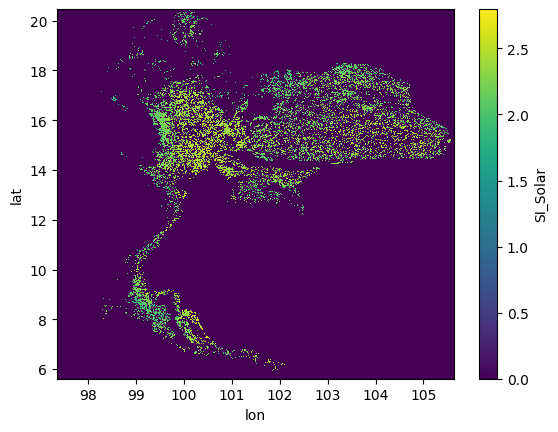

In [34]:
xr_cal['AVA_Wind'] = xr_final_SI['AVA_Wind'].rolling(lat = rolling_latlon_wind,lon = rolling_latlon_wind,center=True,min_periods=1).sum()
xr_cal['AVA_Solar'] = xr_final_SI['AVA_Solar'].rolling(lat = rolling_latlon_solar,lon = rolling_latlon_solar,center=True,min_periods=1).sum()
xr_cal['AVA_Wind'] = xr.where(xr_final_SI['AVA_Wind'] == 0,0,xr_cal['AVA_Wind'])
xr_cal['AVA_Solar'] = xr.where(xr_final_SI['AVA_Solar'] == 0,0,xr_cal['AVA_Solar'])

scale = 3
max_wind = xr_cal['AVA_Wind'].where(xr_cal['AVA_Wind']>0).max()
min_wind = xr_cal['AVA_Wind'].where(xr_cal['AVA_Wind']>0).min()
xr_cal['SI_AVA_Wind'] = xr.where((xr_cal['AVA_Solar']>0) , 3 * (xr_cal['AVA_Wind']-min_wind)/(max_wind-min_wind) , 0)
print(min_wind)

max_solar = xr_cal['AVA_Solar'].where(xr_cal['AVA_Solar']>0).max()
min_solar = xr_cal['AVA_Solar'].where(xr_cal['AVA_Solar']>0).min()
xr_cal['SI_AVA_Solar'] = xr.where((xr_cal['AVA_Solar']>0) , 3 * (xr_cal['AVA_Solar']-min_solar)/(max_solar-min_solar) , 0)
print(min_solar)

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_AVA_Wind'] * weight_wind[9])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_AVA_Solar'] * weight_solar[9])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_AVA_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_AVA_Solar']  == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'].astype('float32')
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'].astype('float32')
xr_final_SI['AVA_Wind'] = xr_final_SI['AVA_Wind'].astype('float32')
xr_final_SI['AVA_Solar'] = xr_final_SI['AVA_Solar'].astype('float32')

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[9]
check_weight_solar = check_weight_solar + weight_solar[9]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

In [35]:
coarsenscale = 3
xr_final_SI = xr_final_SI.coarsen(lat = coarsenscale, lon = coarsenscale, boundary='pad').sum()

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] / (coarsenscale**2)
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] / (coarsenscale**2)


In [36]:
xr_final_SI.to_netcdf(path='Output\\xr_final_SI.nc')

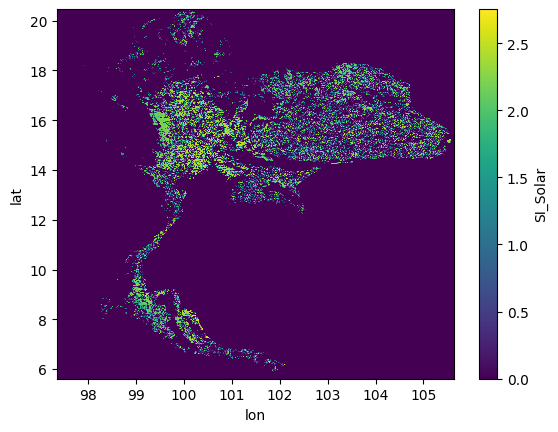

In [37]:
xr_final_SI['SI_Solar'].plot()

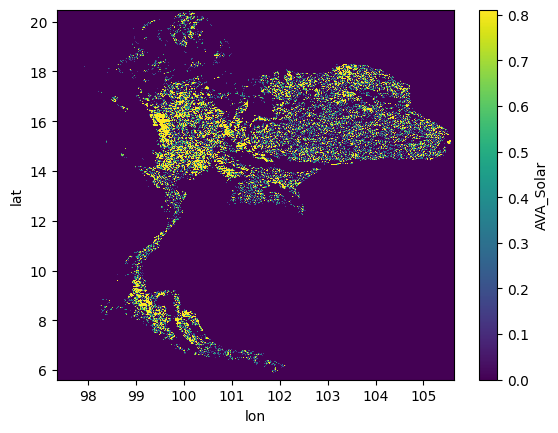

In [38]:
xr_final_SI['AVA_Solar'].plot()

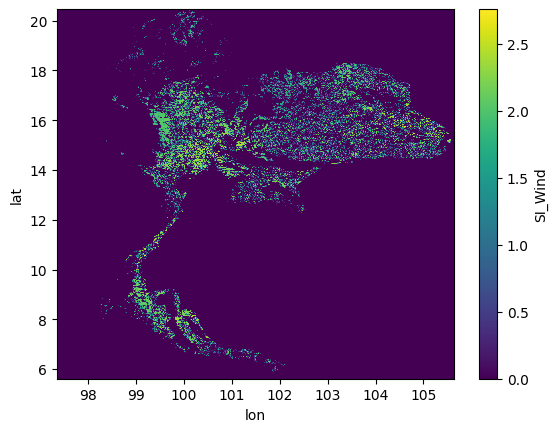

In [39]:
xr_final_SI['SI_Wind'].plot()

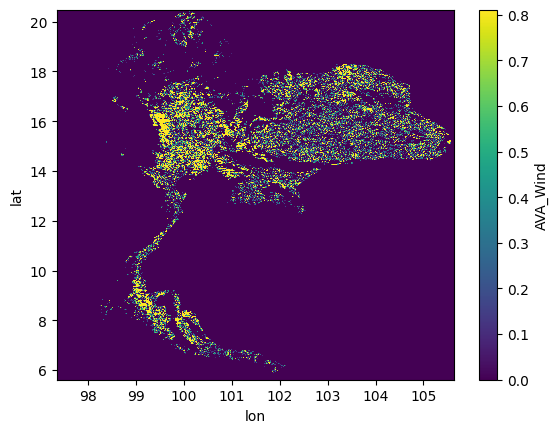

In [40]:
xr_final_SI['AVA_Wind'].plot()